## IMPORTING NECESSARY MODULES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

### Load the dataset into a pandas dataframe and perform any necessary data cleaning and preprocessing.

In [2]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


DESCRIPTIVE ANALYSIS

In [3]:
data.shape

(1460, 81)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
data.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [7]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [10]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## DATA CLEANING

In [11]:
cond = data.isnull().sum() / len(data) > .15
x = data.isnull().sum()[cond]
x

LotFrontage     259
Alley          1369
MasVnrType      872
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

In [12]:
data.drop(x.index, axis = 1, inplace = True)

In [13]:
data.dropna(inplace = True)

In [14]:
data.head(5)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [15]:
cat_data = data.select_dtypes(include= 'object')
cat_data.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [16]:
num_data = data.select_dtypes(exclude = 'object')
num_data.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [17]:
num_data.drop('Id', axis = 1, inplace = True)
num_data.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [18]:
cat_data_ohe = pd.get_dummies(cat_data, drop_first = True)
cat_data_ohe.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,False,False,True,False,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False
1,False,False,True,False,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False
2,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False


In [19]:
n = len(num_data)
print(n)
cont_data_cols = num_data.nunique()[num_data.nunique() > n * 0.1].index
print(cont_data_cols)

1338
Index(['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')


In [20]:
cont_data = num_data[cont_data_cols]
cont_data.head()

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,208500
1,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,181500
2,11250,162.0,486,0,434,920,920,866,1786,608,0,42,223500
3,9550,0.0,216,0,540,756,961,756,1717,642,0,35,140000
4,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,250000


In [21]:
cont_data.shape

(1338, 13)

In [22]:
y = cont_data['SalePrice']
cont_data.drop('SalePrice', axis = 1, inplace = True)

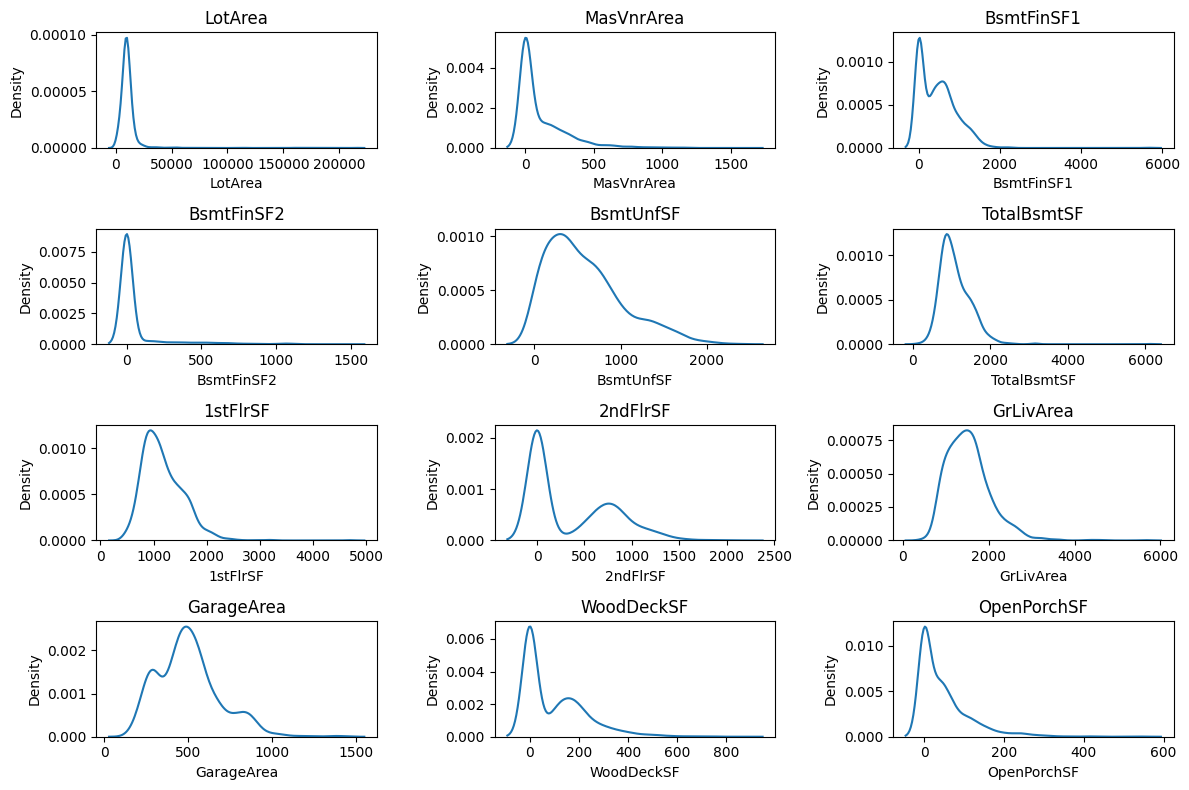

In [23]:
# checking the gaussian distribution for cont_data 

fig, ax = plt.subplots(4, 3, figsize = (12, 8))
for idx, axis in enumerate(ax.flat):
    sns.kdeplot(cont_data.iloc[:, idx], ax = axis)
    axis.set_title(cont_data.columns[idx])
plt.tight_layout()

In [24]:
cont_data.replace(0, 1, inplace = True)

In [25]:
cont_data_log = np.log(cont_data)
cont_data_log.head()

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF
0,9.041922,5.278115,6.559615,0.0,5.010635,6.752270,6.752270,6.749931,7.444249,6.306275,0.000000,4.110874
1,9.169518,0.000000,6.885510,0.0,5.648974,7.140453,7.140453,0.000000,7.140453,6.131226,5.697093,0.000000
2,9.328123,5.087596,6.186209,0.0,6.073045,6.824374,6.824374,6.763885,7.487734,6.410175,0.000000,3.737670
3,9.164296,0.000000,5.375278,0.0,6.291569,6.628041,6.867974,6.628041,7.448334,6.464588,0.000000,3.555348
4,9.565214,5.857933,6.484635,0.0,6.194405,7.043160,7.043160,6.959399,7.695303,6.728629,5.257495,4.430817


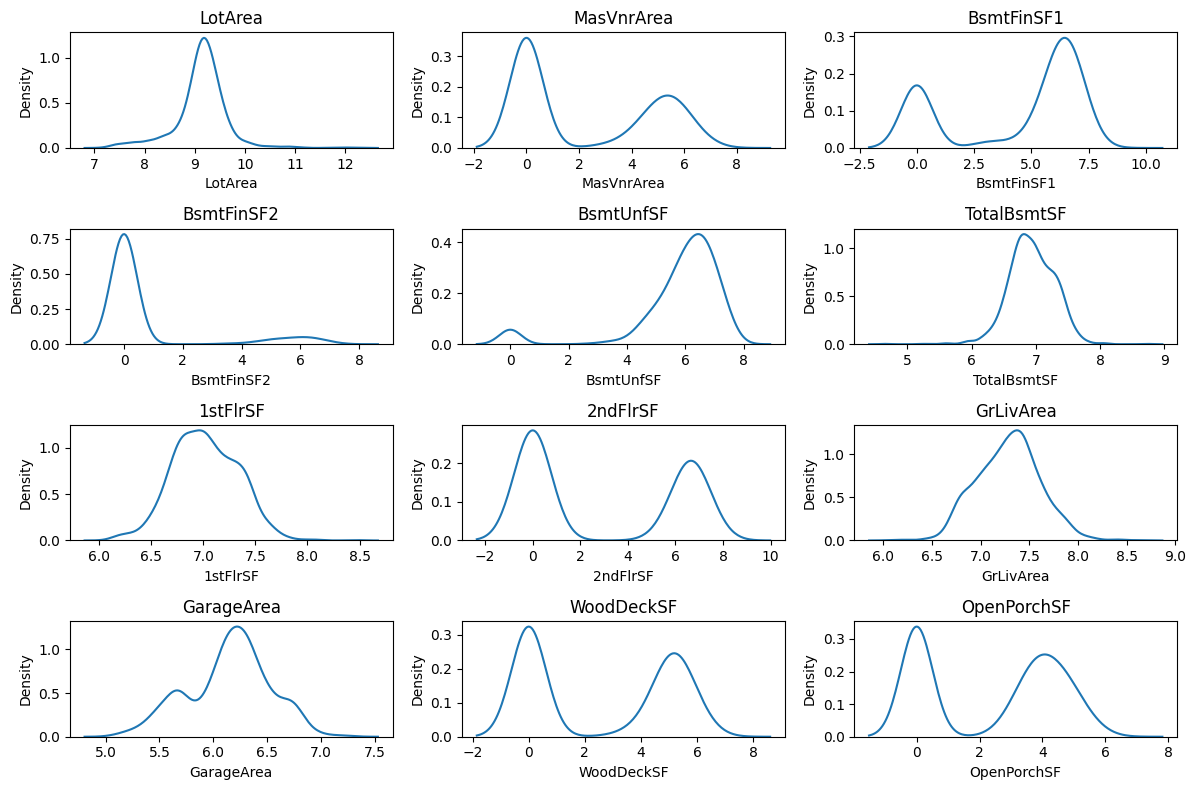

In [26]:
fig, ax = plt.subplots(4, 3, figsize = (12, 8))
for idx, axis in enumerate(ax.flat):
    sns.kdeplot(cont_data_log.iloc[:, idx], ax = axis)
    axis.set_title(cont_data_log.columns[idx])
plt.tight_layout()

In [27]:
# standarizing for the above data
cont_data_log_std = (cont_data_log - cont_data_log.mean()) / cont_data_log.std()

In [28]:
cont_data_log_std.head()

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF
0,-0.164746,1.137815,0.737294,-0.366658,-0.490188,-0.523913,-0.855136,1.156195,0.492167,0.416968,-0.986805,0.811024
1,0.082255,-0.850753,0.848459,-0.366658,-0.094654,0.573011,0.382983,-0.885585,-0.449541,-0.043259,1.202334,-1.116862
2,0.389282,1.066036,0.609922,-0.366658,0.168112,-0.320164,-0.625161,1.160416,0.626962,0.690134,-0.986805,0.636002
3,0.072146,-0.850753,0.333307,-0.366658,0.303516,-0.874958,-0.486095,1.119325,0.504830,0.833194,-0.986805,0.550498
4,0.848241,1.356266,0.711718,-0.366658,0.243311,0.298081,0.072664,1.219557,1.270388,1.527391,1.033416,0.961069


In [29]:
num_data_years = num_data[['YearBuilt', 'YearRemodAdd', 'YrSold']]
num_data_years.head()

,YearBuilt,YearRemodAdd,YrSold
0,2003,2003,2008
1,1976,1976,2007
2,2001,2002,2008
3,1915,1970,2006
4,2000,2000,2008


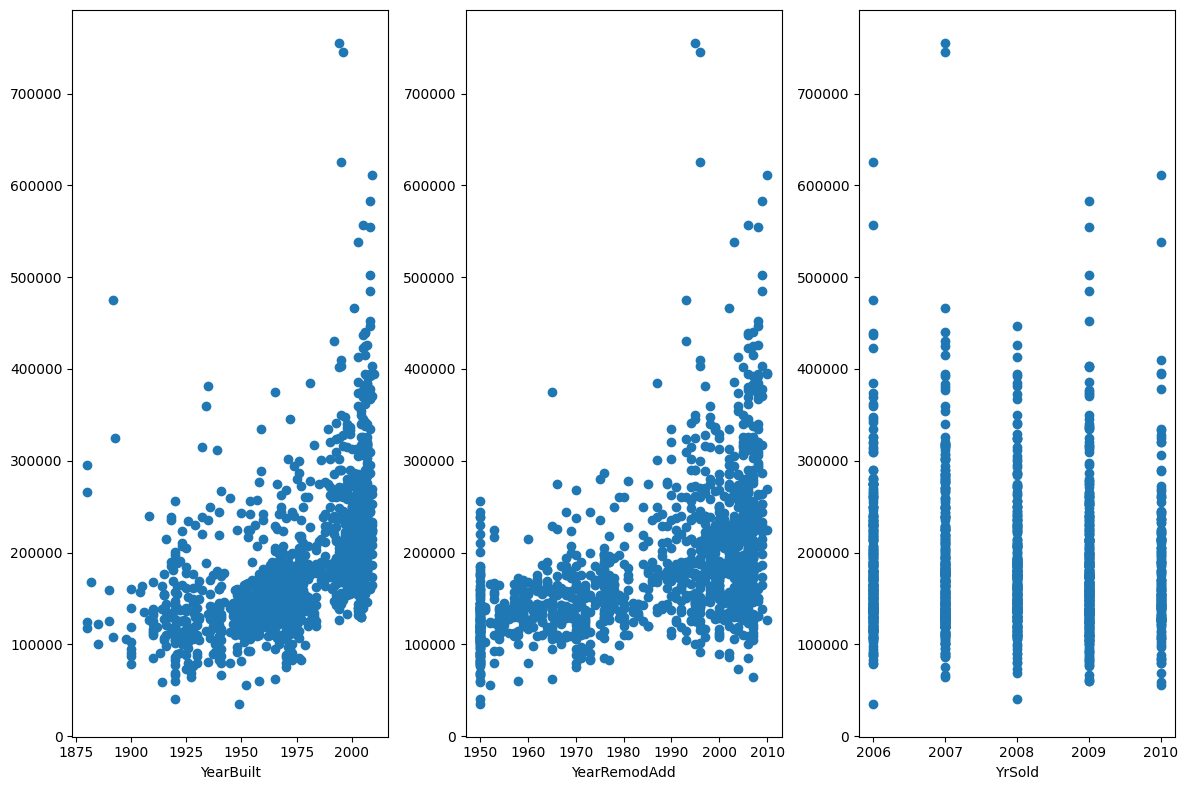

In [30]:
fig, ax = plt.subplots(1,3, figsize = (12, 8))
for idx, axis in enumerate(ax.flat):
    axis.scatter(num_data_years.iloc[:, idx], y)
    axis.set_xlabel(num_data_years.columns[idx])
plt.tight_layout()

In [31]:
initial_val = 0.1
quantile_years_built = []
quantile_years_remodadd = []
quantile_years_sold = []
for i in range(1, 10):
    quantile_years_built.append(num_data_years['YearBuilt'].quantile(initial_val * i))
    quantile_years_remodadd.append(num_data_years['YearRemodAdd'].quantile(initial_val * i))
    quantile_years_sold.append(num_data_years['YrSold'].quantile(initial_val * i))
print(quantile_years_built)
print(quantile_years_remodadd)
print(quantile_years_sold) 

[1926.0, 1950.0, 1959.0, 1967.0, 1976.0, 1989.0, 1998.0, 2003.6000000000001, 2006.0]
[1950.0, 1963.0, 1972.0, 1983.0, 1994.5, 1999.0, 2002.9, 2005.0, 2007.0]
[2006.0, 2006.0, 2007.0, 2007.0, 2008.0, 2008.0, 2009.0, 2009.0, 2010.0]


In [32]:
new_quantile_years_built= []
new_quantile_years_remodadd = []
new_quantile_years_sold = []
for i in quantile_years_built:
    n = int(i)
    new_quantile_years_built.append(n)
for j in quantile_years_remodadd:
    n = int(j)
    new_quantile_years_remodadd.append(n)
for k in quantile_years_sold:
    n = int(k)
    new_quantile_years_sold.append(n)
print(new_quantile_years_built)
print(new_quantile_years_remodadd)
print(new_quantile_years_sold)


[1926, 1950, 1959, 1967, 1976, 1989, 1998, 2003, 2006]
[1950, 1963, 1972, 1983, 1994, 1999, 2002, 2005, 2007]
[2006, 2006, 2007, 2007, 2008, 2008, 2009, 2009, 2010]


In [33]:
for idx, val in enumerate(new_quantile_years_built):
    idx = idx + 1
    vals = idx * 0.1
    cond = (num_data_years['YearBuilt'] <= val) & (num_data_years['YearBuilt'] >= 1)
    num_data_years['YearBuilt'][cond] = vals
for idx, val in enumerate(new_quantile_years_remodadd):
    idx = idx + 1
    vals = idx * 0.1
    cond = (num_data_years['YearRemodAdd'] <= val) & (num_data_years['YearRemodAdd'] >= 1)
    num_data_years['YearRemodAdd'][cond] = vals
for idx, val in enumerate(new_quantile_years_sold):
    idx = idx + 1
    vals = idx * 0.1
    cond = (num_data_years['YrSold'] <= val) & (num_data_years['YrSold'] >= 1)
    num_data_years['YrSold'][cond] = vals 
  

In [34]:
# normalization for num_data_years
normalize_num_data_years = num_data_years - num_data_years.min()/ num_data_years.max()-num_data_years.min()
normalize_num_data_years

,YearBuilt,YearRemodAdd,YrSold
0,0.69995,0.69995,0.288889
1,0.39995,0.29995,0.088889
2,0.69995,0.59995,0.288889
3,-0.00005,0.19995,-0.111111
4,0.69995,0.59995,0.288889
...,...,...,...
1455,0.69995,0.59995,0.088889
1456,0.49995,0.39995,0.688889
1457,0.09995,0.79995,0.688889
1458,0.09995,0.49995,0.688889


<Axes: xlabel='SalePrice', ylabel='Density'>

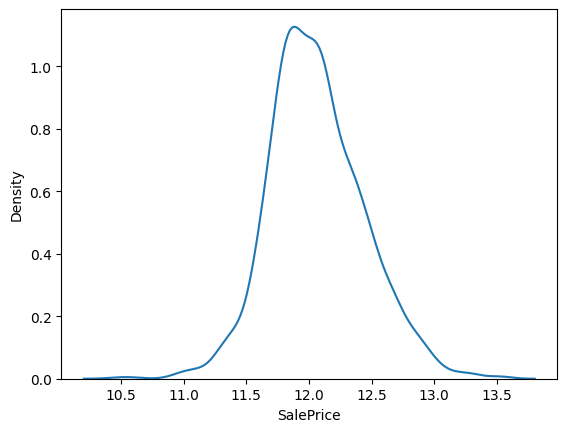

In [35]:
saleprice = np.log1p(num_data['SalePrice'])
sns.kdeplot(saleprice)

In [50]:
# standarizatiion for the saleprice
sale_price_std = (saleprice - saleprice.mean())/saleprice.std()
sale_price_std

0       0.488797
1       0.120788
2       0.673148
3      -0.568118
4       0.970482
          ...   
1455    0.024013
1456    0.507819
1457    1.140082
1458   -0.528143
1459   -0.429639
Name: SalePrice, Length: 1338, dtype: float64

In [52]:
pdsaleprice = pd.Series(saleprice, name = 'NewSalePrice')

In [38]:
cat_data_ohe.reset_index(drop = True , inplace = True)
normalize_num_data_years.reset_index(drop = True , inplace = True)
cont_data_log_std.reset_index(drop = True , inplace = True)
pdsaleprice.reset_index(drop = True , inplace = True)


In [39]:
new_data = pd.concat([cat_data_ohe,normalize_num_data_years,cont_data_log_std,pdsaleprice],axis = 1)

In [40]:
new_data.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,NewSalePrice
0,False,False,True,False,True,False,False,True,False,False,...,-0.366658,-0.490188,-0.523913,-0.855136,1.156195,0.492167,0.416968,-0.986805,0.811024,12.247699
1,False,False,True,False,True,False,False,True,False,False,...,-0.366658,-0.094654,0.573011,0.382983,-0.885585,-0.449541,-0.043259,1.202334,-1.116862,12.109016
2,False,False,True,False,True,False,False,False,False,False,...,-0.366658,0.168112,-0.320164,-0.625161,1.160416,0.626962,0.690134,-0.986805,0.636002,12.317171
3,False,False,True,False,True,False,False,False,False,False,...,-0.366658,0.303516,-0.874958,-0.486095,1.119325,0.504830,0.833194,-0.986805,0.550498,11.849405
4,False,False,True,False,True,False,False,False,False,False,...,-0.366658,0.243311,0.298081,0.072664,1.219557,1.270388,1.527391,1.033416,0.961069,12.429220


# Prepare the data for training and testing

In [41]:
# Selecting relevant features
X = new_data.iloc[:, :-1]
y = new_data['NewSalePrice']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)


#### TRAINING MODEL


we can create a Linear Regression model and train it on the training set

In [42]:
# Creating and training the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
model.coef_

array([ 5.24191768e-01,  5.50762447e-01,  4.77431242e-01,  4.38534291e-01,
        1.19005941e-01,  5.47042161e-03,  3.06889720e-02,  1.38540862e-02,
        3.96417989e-02, -4.54539185e-02,  6.43452421e-03, -1.14078536e-01,
        1.77224117e-02, -6.27588358e-02, -6.25478832e-02, -1.10639443e-02,
        3.03463710e-02, -5.98520607e-02,  1.60633810e-02, -3.78637324e-02,
       -4.75796017e-03, -4.87248536e-02, -7.17907637e-02,  5.07837466e-02,
       -1.93103913e-01, -6.21577556e-02, -7.53428093e-02, -2.64714172e-01,
       -8.81236178e-02, -1.13119455e-01,  1.72215643e-03, -9.58478551e-02,
        5.18038804e-02,  3.53706811e-02, -8.72330543e-02, -1.27149301e-01,
       -1.04298957e-01, -7.01328414e-02, -2.67967646e-02,  1.09108764e-01,
       -5.53825167e-02,  1.10551790e-02,  2.87635604e-02,  1.03511430e-01,
        9.50563687e-02,  1.34665950e-01, -3.27200676e-02,  7.91091895e-02,
        5.30715577e-02,  1.70195725e-01,  1.14314172e-01,  2.41399139e-01,
        4.36113894e-01, -

In [44]:
model.intercept_

9.577201902172298

In [45]:
len(y_test)

268

In [46]:
# calculating MSE for the predictions made by linear regression model on the test set
total_error = 0
for a in range(len(y_test)):
    sum = 0
    for i, j in zip(X_test.iloc[a,:], model.coef_):
        sum = sum + i * j
        pred = sum + model.intercept_
        error = (pred - y_test.iloc[a]) ** 2
    total_error += error
print(total_error)

4.35349762182762


In [47]:
y_pred = model.predict(X_test)

In [48]:

from sklearn.metrics import r2_score
score = r2_score(y_pred, y_test)
print(score)

0.8673250524416826
